In [1]:
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import os
from os import walk
import matplotlib.pylab as plt


In [2]:
def excel_to_pd(data_pd,data_pd_i,current_pd, cell_type, substance):

    for label, content in current_pd.items():
       

        data_pd_i['OD'] = content
        data_pd_i['Cell_type'] = cell_type
        data_pd_i['Substance'] = substance
        data_pd_i['Concentration'] = label

        data_pd = pd.concat([data_pd,data_pd_i])
    return data_pd

In [3]:

folder_path = "C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv"

files = []
for (dirpath, dirnames, filenames) in walk(folder_path):
    for file in filenames:
        files.append(os.path.join(dirpath, file))

print(files)

['C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv\\GA-520.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv\\GA-533.csv', 'C:\\Users\\Modern\\Desktop\\Бельская\\Converted\\csv\\GA-614.csv']


In [4]:
labels = {'OD':[],'Cell_type':[],'Substance':[],'Concentration':[]}
data_pd = pd.DataFrame(labels)
data_pd_i = pd.DataFrame(labels)

for file in files:
   file_name_ext = os.path.basename(file)
   file_name,extention = file_name_ext.split(".")

   file_raw = pd.read_csv(file) 

   data_pd = excel_to_pd(data_pd,data_pd_i,file_raw,'Vero',file_name)

# print(file_raw)

<AxesSubplot: xlabel='Substance', ylabel='OD'>

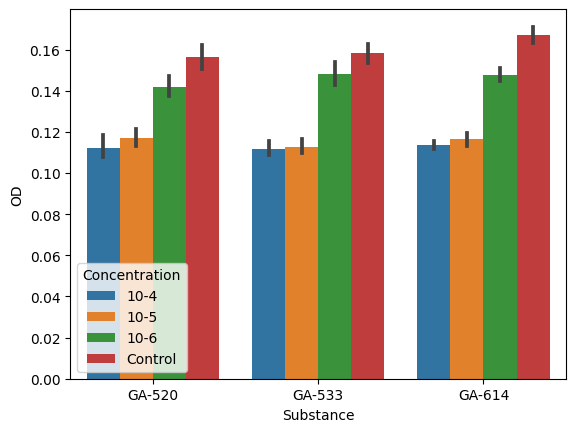

In [5]:
data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()

sns.barplot(data = data_ext, x = 'Substance', y = 'OD', hue = 'Concentration')

Blank subtraction

In [6]:
unique_substances= data_pd['Concentration'].unique()

unique_concentrations= data_pd['Substance'].unique()

print(unique_substances)

print(unique_concentrations)



['10-4' '10-5' '10-6' 'Control']
['GA-520' 'GA-533' 'GA-614']


In [32]:
data_extracted_substance = data_pd[(data_pd['Substance'] == 'GA-614')].copy() 

high_concentration_OD = data_pd[(data_pd['Concentration'] == '10-4') & (data_pd['Substance'] == 'GA-614')].mean()

print(high_concentration_OD)

blank = high_concentration_OD.iloc[0]

data_extracted_substance['OD_blank_correcetd'] = data_extracted_substance['OD'] - blank

print(data_extracted_substance)



OD    0.113625
dtype: float64
       OD Cell_type Substance Concentration  OD_blank_correcetd
0   0.117      Vero    GA-614          10-4            0.003375
1   0.113      Vero    GA-614          10-4           -0.000625
2   0.119      Vero    GA-614          10-4            0.005375
3   0.110      Vero    GA-614          10-4           -0.003625
4   0.119      Vero    GA-614          10-4            0.005375
..    ...       ...       ...           ...                 ...
19  0.155      Vero    GA-614       Control            0.041375
20  0.147      Vero    GA-614       Control            0.033375
21  0.160      Vero    GA-614       Control            0.046375
22  0.167      Vero    GA-614       Control            0.053375
23  0.184      Vero    GA-614       Control            0.070375

[96 rows x 5 columns]


C:\Users\Modern\AppData\Local\Temp\ipykernel_21928\3747054040.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_concentration_OD = data_pd[(data_pd['Concentration'] == '10-4') & (data_pd['Substance'] == 'GA-614')].mean()


Recalculation to relative values:

In [33]:
# data_ext = data_pd[(data_pd['Cell_type'] == 'Vero')].copy()
substances_list = data_pd['Substance'].unique()

labels = {'OD':[],'Relative':[],'Substance':[],'Concentration':[], 'OD_blank_correcetd':[]}
data = pd.DataFrame(labels)

for substance in substances_list:
    data_i = data_extracted_substance[(data_extracted_substance['Substance'] == substance)]
    control_mean = data_i.loc[data_i['Concentration']=='Control', 'OD_blank_correcetd'].mean()
    data_i['Relative'] = data_i['OD_blank_correcetd']/control_mean*100
    data = pd.concat([data,data_i])
  
print(data)

       OD    Relative Substance Concentration  OD_blank_correcetd Cell_type
0   0.117    6.323185    GA-614          10-4            0.003375      Vero
1   0.113   -1.170960    GA-614          10-4           -0.000625      Vero
2   0.119   10.070258    GA-614          10-4            0.005375      Vero
3   0.110   -6.791569    GA-614          10-4           -0.003625      Vero
4   0.119   10.070258    GA-614          10-4            0.005375      Vero
..    ...         ...       ...           ...                 ...       ...
19  0.155   77.517564    GA-614       Control            0.041375      Vero
20  0.147   62.529274    GA-614       Control            0.033375      Vero
21  0.160   86.885246    GA-614       Control            0.046375      Vero
22  0.167  100.000000    GA-614       Control            0.053375      Vero
23  0.184  131.850117    GA-614       Control            0.070375      Vero

[96 rows x 6 columns]


In [34]:

extracted_data = data[(data['Substance'] == 'GA-614')].copy()

unique_concentrations= extracted_data['Concentration'].unique()
unique_substances= extracted_data['Substance'].unique()

pairs = []
for subst in unique_substances:
    for conc in unique_concentrations:
        # if conc == 'Control':
        #     break
        pairs.append(((subst,conc),(subst,'Control')))
        

print(pairs)


[(('GA-614', '10-4'), ('GA-614', 'Control')), (('GA-614', '10-5'), ('GA-614', 'Control')), (('GA-614', '10-6'), ('GA-614', 'Control')), (('GA-614', 'Control'), ('GA-614', 'Control'))]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

GA-614_Control vs. GA-614_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.880e+02
GA-614_10-6 vs. GA-614_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.631e-06 U_stat=4.200e+01
GA-614_10-5 vs. GA-614_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.198e-08 U_stat=0.000e+00
GA-614_10-4 vs. GA-614_Control: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.208e-08 U_stat=0.000e+00


(<AxesSubplot: ylabel='Viable cell, % of control'>,
  <statannotations.Annotation.Annotation at 0x2280b12f850>])

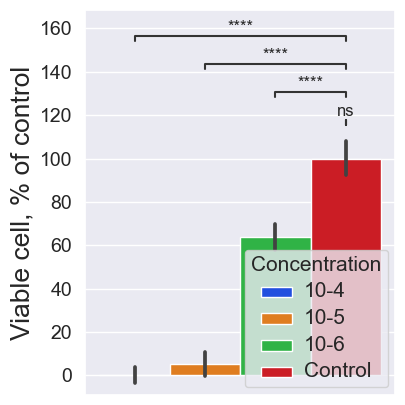

In [35]:
ax = sns.barplot(data = extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration',palette='bright')

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,5)})

ax.legend(loc='lower right', title='Concentration')
plt.setp(ax.get_legend().get_texts(), fontsize='15') 
plt.setp(ax.get_legend().get_title(), fontsize='15') 

ax.set(xlabel=None, ylabel='Viable cell, % of control')
ax.set(xticklabels=[])
ax.yaxis.get_label().set_fontsize(19)
ax.xaxis.get_label().set_fontsize(19)
ax.tick_params(axis='y', which='major', labelsize=14)

annotator = Annotator(ax, pairs, data=extracted_data, x = 'Substance', y = 'Relative', hue = 'Concentration')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', comparisons_correction="Bonferroni")
annotator.apply_and_annotate()

